In [6]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
ConfusionMatrixDisplay()

In [18]:
def run_model(modelo, x_train, y_train, x_test, y_test):
    modelo.fit(x_train, y_train)

    try:
        prob_predict = modelo.predict_proba(x_test)
    except:
        # Modelo não aceita resultado em probabilidade
        prob_predict = '-'

    data_bom = np.sort(prob_predict)[:, 0]
    data_mau = np.sort(prob_predict)[:, 1]
    kstest = stats.ks_2samp(data_bom, data_mau)


    print(f'\n-------Resultados {modelo}-------\n')
    print(f'Métrica KS: {kstest}')
    print('\n')
    print('Confusion Matrix')
    fig, ax = plt.subplots(figsize=(7,7))
    matriz_confusao = ConfusionMatrixDisplay.from_estimator(modelo, x_test, y_test, normalize='true', display_labels=['Bom pagador','Mau pagador'],
                                                              ax=ax, cmap=plt.cm.Blues)
    ax.set_title('Matriz de confusão\nNormalizada', fontsize=16, fontweight='bold')
    ax.set_xlabel('Predito', fontsize=14)
    ax.set_ylabel('Ground truth', fontsize=14)
    plt.grid(False)
    plt.show()

    predict = modelo.predict(x_test)
    print(f'\nClassification Report\n')
    print(classification_report(y_test, predict, zero_division=0))

    print('\nROC Curve\n')
    RocCurveDisplay.from_estimator(modelo, x_test, y_test)

In [2]:
df_train = pd.read_csv('../../dados/credit_score/df_train_clean.csv')
df_test = pd.read_csv('../../dados/credit_score/df_test_clean.csv')

In [4]:
x_train, y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]
x_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]

# Rodando modelos

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logistic_model = LogisticRegression()


-------Resultados LogisticRegression()-------

Métrica KS: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=0.49983447955259985, statistic_sign=1)


Confusion Matrix


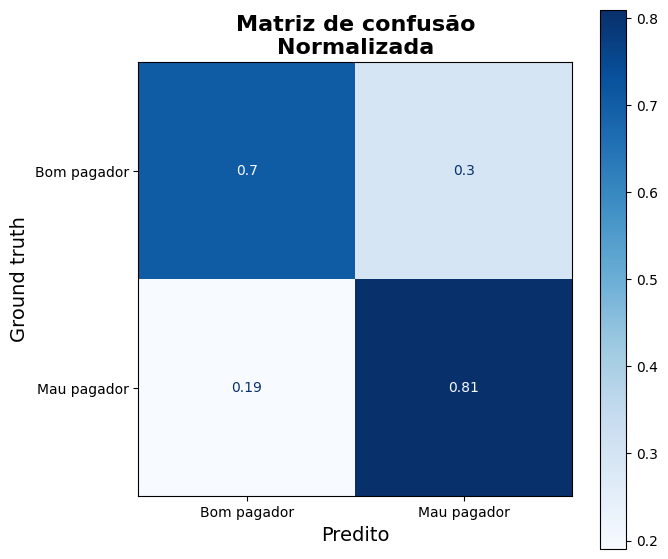


Classification Report

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      6962
           1       0.73      0.81      0.77      6962

    accuracy                           0.76     13924
   macro avg       0.76      0.76      0.76     13924
weighted avg       0.76      0.76      0.76     13924


ROC Curve



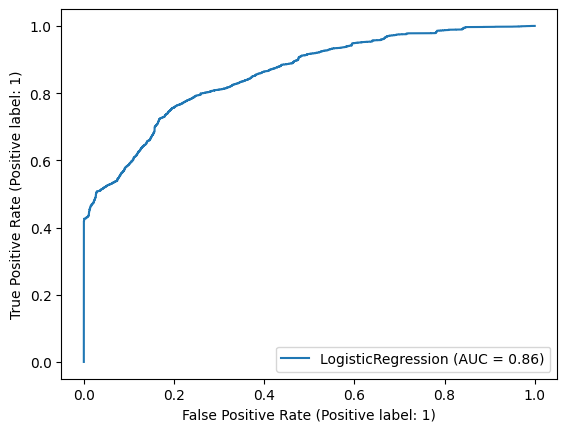

In [19]:
run_model(logistic_model, x_train, y_train, x_test, y_test)